In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Steps:
 - [x] check if changing to tensors with gradient automatically changes the inputs
 - [ ] get multidimensional regression to work
 - [ ] check if gradient is calculated correctly for the inputs
 - [ ] check if in an toy example we could guess a missing parameter

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [3]:
optimizer.__dict__

{'defaults': {'lr': 0.001,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False},
 '_zero_grad_profile_name': 'Optimizer.zero_grad#SGD.zero_grad',
 'state': defaultdict(dict, {}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[-0.4486]], requires_grad=True),
    Parameter containing:
    tensor([0.4860], requires_grad=True)],
   'lr': 0.001,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False}],
 '_warned_capturable_if_run_uncaptured': True}

Epoch [5/60], Loss: 0.1723
Epoch [10/60], Loss: 0.1721
Epoch [15/60], Loss: 0.1720
Epoch [20/60], Loss: 0.1720
Epoch [25/60], Loss: 0.1720
Epoch [30/60], Loss: 0.1720
Epoch [35/60], Loss: 0.1720
Epoch [40/60], Loss: 0.1720
Epoch [45/60], Loss: 0.1720
Epoch [50/60], Loss: 0.1720
Epoch [55/60], Loss: 0.1719
Epoch [60/60], Loss: 0.1719


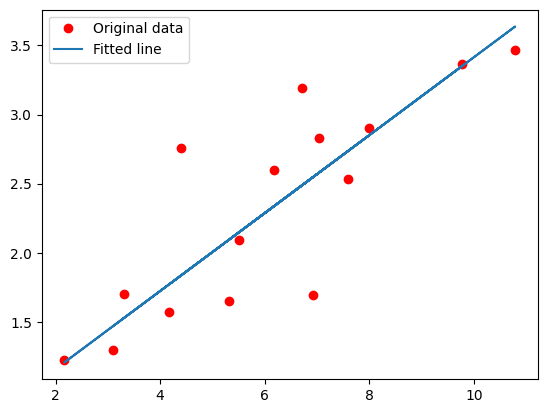

In [5]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train, requires_grad=True)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Check if we could create our own linear regression where we recover a feature

#### Always keep normalization in mind

In [67]:
# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[1, 2], [2, 3], [4, 5], [14, 3], [1, 12.312], [1, 2.345], 
                    [5, 2], [12, 4], [12, 5], [19, 12], [38, 5], 
                    [12, 1], [12, 32], [11, 1], [1, 1]], dtype=np.float32)

y_train = (x_train * np.array([2, 4], dtype=np.float32)).sum(axis=1).reshape(-1, 1) + 0.1 * (np.random.rand(15) - 0.5)
y_train = np.array(y_train, dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

Epoch [5/60], Loss: 225.7617
Epoch [10/60], Loss: 54.0790
Epoch [15/60], Loss: 15.5246
Epoch [20/60], Loss: 4.4686
Epoch [25/60], Loss: 1.2893
Epoch [30/60], Loss: 0.3750
Epoch [35/60], Loss: 0.1121
Epoch [40/60], Loss: 0.0364
Epoch [45/60], Loss: 0.0146
Epoch [50/60], Loss: 0.0083
Epoch [55/60], Loss: 0.0065
Epoch [60/60], Loss: 0.0059


ValueError: x has 2 columns but y has 15 columns

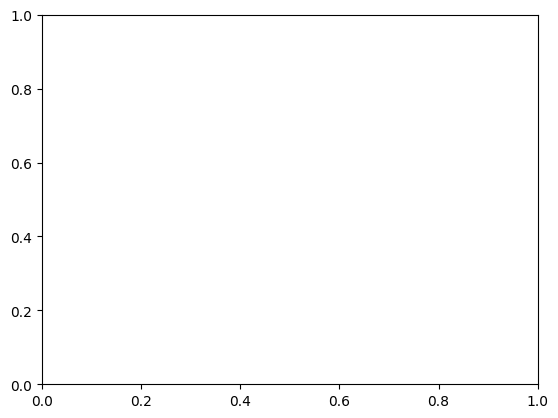

In [70]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Set the model parameters directly

In [ ]:
from collections import OrderedDict
from torch.nn.parameter import Parameter

d = OrderedDict({'weight': Parameter(data=torch.tensor([[2, 3.9]], dtype=torch.float32), requires_grad=True),
                 'bias': Parameter(data=torch.tensor([0], dtype=torch.float32), requires_grad=True)})
model._parameters = d

#### Now let us remove one parameter and check whether we still find an acceptable solution

In [71]:
# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[1, 2], [2, 3], [4, 5], [14, 3], [1, 12.312], [1, 2.345], 
                    [5, 2], [12, 4], [12, 5], [19, 12], [38, 5], 
                    [12, 1], [12, 32], [11, 1], [1, 1]], dtype=np.float32)

y_train = (x_train * np.array([2, 4], dtype=np.float32)).sum(axis=1).reshape(-1, 1) + 0.1 * (np.random.rand(15) - 0.5)
y_train = np.array(y_train, dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#### manipulate the training data to exclude one feature

In [80]:
x_train.shape

(15, 2)

In [83]:
np.vstack((x_train[:, 0], np.random.rand(x_train.shape[0]))).reshape(x_train.shape)

array([[1.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 1.40000000e+01],
       [1.00000000e+00, 1.00000000e+00],
       [5.00000000e+00, 1.20000000e+01],
       [1.20000000e+01, 1.90000000e+01],
       [3.80000000e+01, 1.20000000e+01],
       [1.20000000e+01, 1.10000000e+01],
       [1.00000000e+00, 2.34290436e-01],
       [8.86693210e-01, 1.43554590e-01],
       [7.17692831e-01, 5.41982109e-01],
       [7.86232719e-01, 2.68858053e-01],
       [3.80623010e-01, 9.07778784e-01],
       [2.73902574e-01, 5.80978158e-01],
       [3.03796041e-01, 9.83689234e-01],
       [6.29990309e-01, 2.69741869e-02]])

In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.tensor(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#### Load Chess Elo and try to implement model

In [60]:
import pandas as pd
import numpy as np
import pandas as pd

import torch 
import torch.nn as nn

In [3]:
df = pd.read_csv("data/training_data.csv")
df.columns = ['month', 'white', 'black', 'score']

In [6]:
batch_size = 64
lr = 0.01

In [64]:
player_ids = list(set(list(df["white"].unique()) + list(df["black"].unique())))

In [124]:
mapping_srs = pd.Series(player_ids).reset_index().rename(columns={0: 'id'}).set_index('id')['index']

In [125]:
df['white_mapped'] = df['white'].map(mapping_srs)
df['black_mapped'] = df['black'].map(mapping_srs)

In [65]:
player_tensors = torch.randn(len(mapping_srs), 3, requires_grad=True)

In [107]:
class NeuralNet(nn.Module):
    def __init__(self, input_size1, input_size2, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size1 + input_size2, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), axis=1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.sigmoid(out)

In [108]:
model = NeuralNet(3, 3, 10, 1)

In [114]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr) 

In [147]:
# convert score so that pytorch can handle it
df["score"] = df["score"].astype(np.float32)

In [158]:
player_tensors = torch.randn(len(mapping_srs), 3, requires_grad=True)

In [160]:
player_tensors

tensor([[-0.7498,  0.7656, -1.6891],
        [-0.7537, -0.7414,  0.3946],
        [ 0.2428,  0.0327, -0.0109],
        ...,
        [ 0.3606, -0.0112, -1.5369],
        [ 0.5878, -0.5341, -0.2857],
        [-0.2961, -1.1575,  1.0276]], requires_grad=True)

In [167]:
t = torch.tensor([[1. , 2.], [3., 4.]])

In [168]:
t

tensor([[1., 2.],
        [3., 4.]])

In [169]:
t[0, :] = t[0, :] * 0.95

In [170]:
t

tensor([[0.9500, 1.9000],
        [3.0000, 4.0000]])

In [268]:
player_tensors = torch.randn(len(mapping_srs), 3, requires_grad=True)

In [269]:
idx = 0
lr_p = 0.05

curr_df = df.iloc[idx*batch_size:(idx+1)*batch_size]
white_tensors = torch.clone(player_tensors[curr_df["white_mapped"].values, :])
black_tensors = torch.clone(player_tensors[curr_df["black_mapped"].values, :])
predicted = model(white_tensors, black_tensors)
result = torch.from_numpy(curr_df['score'].values).reshape(-1, 1)
loss = criterion(result, predicted)

optimizer.zero_grad()

In [270]:
player_tensors.grad = torch.zeros(player_tensors.shape)

In [271]:
loss.backward()

In [272]:
player_tensors[61, :]

tensor([-0.7090, -1.5282, -0.1766], grad_fn=<SliceBackward0>)

In [273]:
player_tensors.grad[61, :]

tensor([ 1.2449e-05, -4.8616e-04, -2.8824e-04])

In [265]:
(player_tensors - lr_p * player_tensors.grad)[61, :].detach().numpy()

array([ 0.00905229, -0.14931692,  0.35107905], dtype=float32)

In [174]:
idx = 0
lr_p = 0.05

curr_df = df.iloc[idx*batch_size:(idx+1)*batch_size]
white_tensors = torch.clone(player_tensors[curr_df["white_mapped"].values, :])
black_tensors = torch.clone(player_tensors[curr_df["black_mapped"].values, :])
predicted = model(white_tensors, black_tensors)
result = torch.from_numpy(curr_df['score'].values).reshape(-1, 1)
loss = criterion(result, predicted)

optimizer.zero_grad()
player_tensors.grad = torch.zeros(player_tensors.shape)
loss.backward()
player_tensors = player_tensors - lr_p * player_tensors.grad
optimizer.step()
print(f"This is the loss {loss}")

This is the loss 0.14205339550971985


In [278]:
player_tensors = torch.randn(len(mapping_srs), 3, requires_grad=True)

In [280]:
episodes = 5

for _ in range(episodes):
    for idx in range(int(len(df) / batch_size)):
        curr_df = df.iloc[idx*batch_size:(idx+1)*batch_size]
        white_tensors = player_tensors[curr_df["white_mapped"].values, :]
        black_tensors = player_tensors[curr_df["black_mapped"].values, :]
        predicted = model(white_tensors, black_tensors)
        result = torch.from_numpy(curr_df['score'].values).reshape(-1, 1)
        loss = criterion(result, predicted)
        
        optimizer.zero_grad()
        loss.backward()
        player_tensors = player_tensors - lr_p * player_tensors.grad
        player_tensors.grad = torch.zeros(player_tensors.shape)
        optimizer.step()
        print(f"This is the loss {loss}")

This is the loss 0.1360001266002655
This is the loss 0.17638623714447021
This is the loss 0.1419927030801773
This is the loss 0.16574245691299438
This is the loss 0.1774844378232956
This is the loss 0.17787256836891174
This is the loss 0.14479435980319977
This is the loss 0.14542533457279205
This is the loss 0.13149216771125793
This is the loss 0.12388581037521362
This is the loss 0.12102214246988297
This is the loss 0.13899151980876923
This is the loss 0.1290937066078186
This is the loss 0.13390779495239258
This is the loss 0.12751109898090363
This is the loss 0.12318005412817001
This is the loss 0.1522451937198639
This is the loss 0.1453549712896347
This is the loss 0.16942746937274933
This is the loss 0.11738632619380951
This is the loss 0.1310575008392334
This is the loss 0.15155379474163055
This is the loss 0.11702240258455276
This is the loss 0.14296644926071167
This is the loss 0.15209458768367767
This is the loss 0.12222142517566681
This is the loss 0.15920475125312805
This is 

This is the loss 0.16216903924942017
This is the loss 0.12998628616333008
This is the loss 0.16194309294223785
This is the loss 0.1377306878566742
This is the loss 0.15201923251152039
This is the loss 0.1355239897966385
This is the loss 0.18430352210998535
This is the loss 0.1499878615140915
This is the loss 0.13651876151561737
This is the loss 0.12374527007341385
This is the loss 0.14243653416633606
This is the loss 0.1260196417570114
This is the loss 0.11731830984354019
This is the loss 0.12931323051452637
This is the loss 0.11193614453077316
This is the loss 0.13951988518238068
This is the loss 0.14698661863803864
This is the loss 0.15753190219402313
This is the loss 0.14805695414543152
This is the loss 0.11675775051116943
This is the loss 0.1489066779613495
This is the loss 0.1302705556154251
This is the loss 0.1345127820968628
This is the loss 0.12766863405704498
This is the loss 0.1305215060710907
This is the loss 0.13577473163604736
This is the loss 0.10671680420637131
This is t

This is the loss 0.13623590767383575
This is the loss 0.1297474354505539
This is the loss 0.15262949466705322
This is the loss 0.11806830763816833
This is the loss 0.15036587417125702
This is the loss 0.14904239773750305
This is the loss 0.1215054988861084
This is the loss 0.15548956394195557
This is the loss 0.1563500463962555
This is the loss 0.11417660862207413
This is the loss 0.14102376997470856
This is the loss 0.13377532362937927
This is the loss 0.14299964904785156
This is the loss 0.12485706806182861
This is the loss 0.14642882347106934
This is the loss 0.12493165582418442
This is the loss 0.132239431142807
This is the loss 0.1283019632101059
This is the loss 0.13623803853988647
This is the loss 0.10910751670598984
This is the loss 0.13006997108459473
This is the loss 0.1511823683977127
This is the loss 0.12544095516204834
This is the loss 0.13899946212768555
This is the loss 0.1027107983827591
This is the loss 0.1392897069454193
This is the loss 0.1211308017373085
This is the

This is the loss 0.12487205862998962
This is the loss 0.13813984394073486
This is the loss 0.100165955722332
This is the loss 0.11899814754724503
This is the loss 0.1090712919831276
This is the loss 0.13591346144676208
This is the loss 0.13475531339645386
This is the loss 0.1374407857656479
This is the loss 0.16604845225811005
This is the loss 0.16403742134571075
This is the loss 0.16220661997795105
This is the loss 0.11719778180122375
This is the loss 0.13269047439098358
This is the loss 0.12096776068210602
This is the loss 0.13204726576805115
This is the loss 0.11795394867658615
This is the loss 0.149387389421463
This is the loss 0.1541561484336853
This is the loss 0.1469164490699768
This is the loss 0.11132096499204636
This is the loss 0.13559512794017792
This is the loss 0.1340072900056839
This is the loss 0.13691645860671997
This is the loss 0.16240106523036957
This is the loss 0.14921021461486816
This is the loss 0.13474011421203613
This is the loss 0.1287051886320114
This is the

This is the loss 0.11656336486339569
This is the loss 0.13125233352184296
This is the loss 0.14659324288368225
This is the loss 0.13447219133377075
This is the loss 0.16562683880329132
This is the loss 0.14059995114803314
This is the loss 0.12221517413854599
This is the loss 0.1233254224061966
This is the loss 0.16060681641101837
This is the loss 0.14300334453582764
This is the loss 0.12097866833209991
This is the loss 0.12477134168148041
This is the loss 0.15482847392559052
This is the loss 0.15520311892032623
This is the loss 0.13378116488456726
This is the loss 0.13845956325531006
This is the loss 0.12716640532016754
This is the loss 0.1453220397233963
This is the loss 0.15772701799869537
This is the loss 0.11250299960374832
This is the loss 0.10922349244356155
This is the loss 0.13624542951583862
This is the loss 0.17590072751045227
This is the loss 0.14218758046627045
This is the loss 0.1652420461177826
This is the loss 0.17688822746276855
This is the loss 0.17799918353557587
This

This is the loss 0.15244363248348236
This is the loss 0.16572530567646027
This is the loss 0.11705487966537476
This is the loss 0.12709619104862213
This is the loss 0.09038057923316956
This is the loss 0.12051443010568619
This is the loss 0.16067242622375488
This is the loss 0.1062152162194252
This is the loss 0.14734405279159546
This is the loss 0.12017934024333954
This is the loss 0.12493324279785156
This is the loss 0.1413797289133072
This is the loss 0.14856210350990295
This is the loss 0.12116729468107224
This is the loss 0.14116251468658447
This is the loss 0.15270715951919556
This is the loss 0.1316647231578827
This is the loss 0.12246489524841309
This is the loss 0.1194533258676529
This is the loss 0.13720735907554626
This is the loss 0.1403830647468567
This is the loss 0.14267316460609436
This is the loss 0.17723669111728668
This is the loss 0.1417754739522934
This is the loss 0.1434919238090515
This is the loss 0.16192544996738434
This is the loss 0.12974242866039276
This is 

This is the loss 0.12101206183433533
This is the loss 0.15449392795562744
This is the loss 0.1526842564344406
This is the loss 0.12405399978160858
This is the loss 0.14453795552253723
This is the loss 0.14392715692520142
This is the loss 0.14307235181331635
This is the loss 0.11786291748285294
This is the loss 0.12485989183187485
This is the loss 0.11732407659292221
This is the loss 0.10879099369049072
This is the loss 0.17001540958881378
This is the loss 0.12415537983179092
This is the loss 0.10959911346435547
This is the loss 0.13034674525260925
This is the loss 0.13007207214832306
This is the loss 0.1660173237323761
This is the loss 0.11296556144952774
This is the loss 0.10135835409164429
This is the loss 0.15356823801994324
This is the loss 0.127943217754364
This is the loss 0.14035765826702118
This is the loss 0.15370303392410278
This is the loss 0.13025476038455963
This is the loss 0.14225471019744873
This is the loss 0.13875538110733032
This is the loss 0.12796024978160858
This 

This is the loss 0.16555564105510712
This is the loss 0.1276337057352066
This is the loss 0.14595481753349304
This is the loss 0.1173391193151474
This is the loss 0.11916951835155487
This is the loss 0.1064431220293045
This is the loss 0.14190950989723206
This is the loss 0.1463223248720169
This is the loss 0.15702202916145325
This is the loss 0.13825075328350067
This is the loss 0.12886083126068115
This is the loss 0.12324932962656021
This is the loss 0.12151766568422318
This is the loss 0.1080889031291008
This is the loss 0.12997494637966156
This is the loss 0.1249413937330246
This is the loss 0.13774359226226807
This is the loss 0.10011954605579376
This is the loss 0.11847013235092163
This is the loss 0.10890629887580872
This is the loss 0.13574188947677612
This is the loss 0.1346735954284668
This is the loss 0.13729390501976013
This is the loss 0.16636762022972107
This is the loss 0.16322244703769684
This is the loss 0.16194765269756317
This is the loss 0.11725582927465439
This is 

This is the loss 0.14498549699783325
This is the loss 0.12016976624727249
This is the loss 0.14970889687538147
This is the loss 0.10384023189544678
This is the loss 0.15211358666419983
This is the loss 0.14784985780715942
This is the loss 0.1313561201095581
This is the loss 0.13191545009613037
This is the loss 0.12335224449634552
This is the loss 0.16242516040802002
This is the loss 0.12289407104253769
This is the loss 0.1595914512872696
This is the loss 0.12255221605300903
This is the loss 0.12823474407196045
This is the loss 0.1597505509853363
This is the loss 0.14324353635311127
This is the loss 0.13041973114013672
This is the loss 0.13669314980506897
This is the loss 0.1373351812362671
This is the loss 0.12856100499629974
This is the loss 0.16204415261745453
This is the loss 0.11906322836875916
This is the loss 0.1655159890651703
This is the loss 0.13020294904708862
This is the loss 0.11618614941835403
This is the loss 0.13116973638534546
This is the loss 0.14634129405021667
This i

This is the loss 0.14495478570461273
This is the loss 0.12437841296195984
This is the loss 0.14919644594192505
This is the loss 0.1577208936214447
This is the loss 0.10660004615783691
This is the loss 0.13000841438770294
This is the loss 0.12059526890516281
This is the loss 0.14969328045845032
This is the loss 0.13790854811668396
This is the loss 0.13523787260055542
This is the loss 0.12951883673667908
This is the loss 0.11567795276641846
This is the loss 0.14643102884292603
This is the loss 0.11736609786748886
This is the loss 0.11471512913703918
This is the loss 0.11234764754772186
This is the loss 0.12313530594110489
This is the loss 0.12692461907863617
This is the loss 0.10969561338424683
This is the loss 0.1465994268655777
This is the loss 0.11976366490125656
This is the loss 0.14032381772994995
This is the loss 0.1258653700351715
This is the loss 0.11587844789028168
This is the loss 0.12012539803981781
This is the loss 0.16560465097427368
This is the loss 0.13148541748523712
This

This is the loss 0.13957101106643677
This is the loss 0.1397465020418167
This is the loss 0.14634451270103455
This is the loss 0.13744987547397614
This is the loss 0.1382930725812912
This is the loss 0.10997425019741058
This is the loss 0.15122590959072113
This is the loss 0.16334550082683563
This is the loss 0.1343657225370407
This is the loss 0.161662295460701
This is the loss 0.13716885447502136
This is the loss 0.10394987463951111
This is the loss 0.14068886637687683
This is the loss 0.13453839719295502
This is the loss 0.16942134499549866
This is the loss 0.10500889271497726
This is the loss 0.18430691957473755
This is the loss 0.13855522871017456
This is the loss 0.1581212729215622
This is the loss 0.15634992718696594
This is the loss 0.12110618501901627
This is the loss 0.12717264890670776
This is the loss 0.12871892750263214
This is the loss 0.11235425621271133
This is the loss 0.13711658120155334
This is the loss 0.13619455695152283
This is the loss 0.11927207559347153
This is

This is the loss 0.12034828215837479
This is the loss 0.16022081673145294
This is the loss 0.16021619737148285
This is the loss 0.13782666623592377
This is the loss 0.18545843660831451
This is the loss 0.1312226504087448
This is the loss 0.16505968570709229
This is the loss 0.1412489265203476
This is the loss 0.193211168050766
This is the loss 0.1501447558403015
This is the loss 0.13551990687847137
This is the loss 0.14963899552822113
This is the loss 0.15754751861095428
This is the loss 0.14089033007621765
This is the loss 0.15148980915546417
This is the loss 0.144535094499588
This is the loss 0.13701291382312775
This is the loss 0.14539414644241333
This is the loss 0.12889687716960907
This is the loss 0.12766426801681519
This is the loss 0.14871062338352203
This is the loss 0.15446437895298004
This is the loss 0.12580712139606476
This is the loss 0.1401216983795166
This is the loss 0.11973195523023605
This is the loss 0.09991481900215149
This is the loss 0.12103928625583649
This is t

This is the loss 0.18602192401885986
This is the loss 0.17990198731422424
This is the loss 0.12661072611808777
This is the loss 0.16049334406852722
This is the loss 0.15350544452667236
This is the loss 0.14626333117485046
This is the loss 0.14216846227645874
This is the loss 0.14731696248054504
This is the loss 0.12702111899852753
This is the loss 0.15342147648334503
This is the loss 0.12118234485387802
This is the loss 0.13176387548446655
This is the loss 0.13373391330242157
This is the loss 0.15807640552520752
This is the loss 0.1727910339832306
This is the loss 0.1714133471250534
This is the loss 0.14015962183475494
This is the loss 0.13164082169532776
This is the loss 0.12351541221141815
This is the loss 0.11824902892112732
This is the loss 0.12237118184566498
This is the loss 0.11851242929697037
This is the loss 0.15623894333839417
This is the loss 0.1406419724225998
This is the loss 0.1632409244775772
This is the loss 0.1377234011888504
This is the loss 0.11616162955760956
This i

This is the loss 0.13112621009349823
This is the loss 0.1548861712217331
This is the loss 0.12756232917308807
This is the loss 0.15621916949748993
This is the loss 0.13720302283763885
This is the loss 0.11348246037960052
This is the loss 0.13147787749767303
This is the loss 0.10462500900030136
This is the loss 0.11077750474214554
This is the loss 0.15538610517978668
This is the loss 0.1322948932647705
This is the loss 0.13514597713947296
This is the loss 0.11326221376657486
This is the loss 0.12149501591920853
This is the loss 0.14331018924713135
This is the loss 0.1356056183576584
This is the loss 0.13062863051891327
This is the loss 0.17145869135856628
This is the loss 0.15057465434074402
This is the loss 0.13263146579265594
This is the loss 0.10975588858127594
This is the loss 0.13548564910888672
This is the loss 0.14208652079105377
This is the loss 0.1425759345293045
This is the loss 0.11248452216386795
This is the loss 0.1447024643421173
This is the loss 0.12783943116664886
This i

This is the loss 0.16328567266464233
This is the loss 0.14029264450073242
This is the loss 0.12172701954841614
This is the loss 0.15853305160999298
This is the loss 0.17815321683883667
This is the loss 0.14005593955516815
This is the loss 0.13681551814079285
This is the loss 0.1577153354883194
This is the loss 0.1557418704032898
This is the loss 0.11878873407840729
This is the loss 0.14484184980392456
This is the loss 0.11800418049097061
This is the loss 0.13800829648971558
This is the loss 0.14902295172214508
This is the loss 0.13531090319156647
This is the loss 0.12090344727039337
This is the loss 0.140984907746315
This is the loss 0.1126355305314064
This is the loss 0.12679938971996307
This is the loss 0.09059781581163406
This is the loss 0.13122650980949402
This is the loss 0.11134950816631317
This is the loss 0.13624750077724457
This is the loss 0.1040789932012558
This is the loss 0.1276620775461197
This is the loss 0.13597705960273743
This is the loss 0.10516126453876495
This is 

This is the loss 0.12749901413917542
This is the loss 0.10687913745641708
This is the loss 0.10981722176074982
This is the loss 0.14210845530033112
This is the loss 0.1451384425163269
This is the loss 0.1398783177137375
This is the loss 0.11878178268671036
This is the loss 0.1024019718170166
This is the loss 0.1412699818611145
This is the loss 0.12418879568576813
This is the loss 0.12304703891277313
This is the loss 0.12136125564575195
This is the loss 0.12413029372692108
This is the loss 0.11102959513664246
This is the loss 0.1465255469083786
This is the loss 0.11548206955194473
This is the loss 0.1623016893863678
This is the loss 0.13082768023014069
This is the loss 0.13263022899627686
This is the loss 0.11529581248760223
This is the loss 0.12917084991931915
This is the loss 0.16138142347335815
This is the loss 0.1638186126947403
This is the loss 0.1516743153333664
This is the loss 0.1148725301027298
This is the loss 0.15418407320976257
This is the loss 0.1656692922115326
This is the

This is the loss 0.12650130689144135
This is the loss 0.14867949485778809
This is the loss 0.14623932540416718
This is the loss 0.14576514065265656
This is the loss 0.1371331512928009
This is the loss 0.16239964962005615
This is the loss 0.12059789896011353
This is the loss 0.1503765881061554
This is the loss 0.15735919773578644
This is the loss 0.1559177041053772
This is the loss 0.14428701996803284
This is the loss 0.14165329933166504
This is the loss 0.14480656385421753
This is the loss 0.1633581668138504
This is the loss 0.13568711280822754
This is the loss 0.1259048879146576
This is the loss 0.14929865300655365
This is the loss 0.17011529207229614
This is the loss 0.16388091444969177
This is the loss 0.14376574754714966
This is the loss 0.14636650681495667
This is the loss 0.12676572799682617
This is the loss 0.15116246044635773
This is the loss 0.13926607370376587
This is the loss 0.17785149812698364
This is the loss 0.18230301141738892
This is the loss 0.15032845735549927
This i

This is the loss 0.13751830160617828
This is the loss 0.13432922959327698
This is the loss 0.12415067851543427
This is the loss 0.11924298107624054
This is the loss 0.13663522899150848
This is the loss 0.15167157351970673
This is the loss 0.14661641418933868
This is the loss 0.12688520550727844
This is the loss 0.12448477745056152
This is the loss 0.11355960369110107
This is the loss 0.1494254767894745
This is the loss 0.16122019290924072
This is the loss 0.125174880027771
This is the loss 0.11986695230007172
This is the loss 0.1399185061454773
This is the loss 0.14651674032211304
This is the loss 0.13365161418914795
This is the loss 0.14464373886585236
This is the loss 0.15018931031227112
This is the loss 0.16981980204582214
This is the loss 0.16513189673423767
This is the loss 0.15330033004283905
This is the loss 0.1333221048116684
This is the loss 0.16042405366897583
This is the loss 0.14984163641929626
This is the loss 0.1271798461675644
This is the loss 0.13121724128723145
This is

This is the loss 0.13768011331558228
This is the loss 0.13288748264312744
This is the loss 0.13534724712371826
This is the loss 0.1107192412018776
This is the loss 0.13423597812652588
This is the loss 0.1386066973209381
This is the loss 0.1352793574333191
This is the loss 0.14728014171123505
This is the loss 0.12017779052257538
This is the loss 0.13966289162635803
This is the loss 0.1285267323255539
This is the loss 0.17440178990364075
This is the loss 0.1230316311120987
This is the loss 0.12031898647546768
This is the loss 0.14729221165180206
This is the loss 0.146897554397583
This is the loss 0.12875407934188843
This is the loss 0.15295036137104034
This is the loss 0.14295092225074768
This is the loss 0.17002548277378082
This is the loss 0.12740540504455566
This is the loss 0.11987113207578659
This is the loss 0.12932291626930237
This is the loss 0.15144740045070648
This is the loss 0.1387723833322525
This is the loss 0.12929046154022217
This is the loss 0.13641922175884247
This is t

This is the loss 0.15184827148914337
This is the loss 0.12497379630804062
This is the loss 0.1380959004163742
This is the loss 0.1018211767077446
This is the loss 0.1401301622390747
This is the loss 0.11984966695308685
This is the loss 0.11716164648532867
This is the loss 0.14008279144763947
This is the loss 0.12067509442567825
This is the loss 0.13945038616657257
This is the loss 0.1380237340927124
This is the loss 0.14802566170692444
This is the loss 0.16905124485492706
This is the loss 0.1367272436618805
This is the loss 0.13840770721435547
This is the loss 0.13859254121780396
This is the loss 0.11924563348293304
This is the loss 0.13644558191299438
This is the loss 0.14564529061317444
This is the loss 0.12631700932979584
This is the loss 0.11937244981527328
This is the loss 0.08613895624876022
This is the loss 0.13785189390182495
This is the loss 0.12795421481132507
This is the loss 0.15515026450157166
This is the loss 0.11424984037876129
This is the loss 0.14167870581150055
This i

This is the loss 0.11943253874778748
This is the loss 0.13145975768566132
This is the loss 0.11557465046644211
This is the loss 0.1495456099510193
This is the loss 0.15267080068588257
This is the loss 0.14693012833595276
This is the loss 0.11057233810424805
This is the loss 0.13499656319618225
This is the loss 0.13364484906196594
This is the loss 0.13620387017726898
This is the loss 0.16283318400382996
This is the loss 0.14820319414138794
This is the loss 0.13595056533813477
This is the loss 0.12669746577739716
This is the loss 0.12411542981863022
This is the loss 0.13812008500099182
This is the loss 0.1631203293800354
This is the loss 0.1508125215768814
This is the loss 0.16580747067928314
This is the loss 0.17616914212703705
This is the loss 0.12025313079357147
This is the loss 0.1605108380317688
This is the loss 0.11918336153030396
This is the loss 0.1515600085258484
This is the loss 0.1341247856616974
This is the loss 0.12534086406230927
This is the loss 0.150345116853714
This is t

This is the loss 0.15915018320083618
This is the loss 0.12258855253458023
This is the loss 0.12642648816108704
This is the loss 0.16000929474830627
This is the loss 0.14305530488491058
This is the loss 0.12983554601669312
This is the loss 0.13714787364006042
This is the loss 0.1356678605079651
This is the loss 0.12768639624118805
This is the loss 0.16233065724372864
This is the loss 0.11810469627380371
This is the loss 0.1643591821193695
This is the loss 0.1308518797159195
This is the loss 0.11552058160305023
This is the loss 0.1311185359954834
This is the loss 0.14571399986743927
This is the loss 0.13570617139339447
This is the loss 0.16557112336158752
This is the loss 0.1426713466644287
This is the loss 0.12238145619630814
This is the loss 0.12241549044847488
This is the loss 0.16138820350170135
This is the loss 0.14233750104904175
This is the loss 0.12068676948547363
This is the loss 0.12218883633613586
This is the loss 0.15574944019317627
This is the loss 0.1546746790409088
This is

In [283]:
torch.mean(result)

tensor(0.5312)

In [284]:
torch.mean(model(white_tensors, black_tensors))

tensor(0.5433, grad_fn=<MeanBackward0>)

In [139]:
result.reshape(-1, 1).shape

torch.Size([64, 1])

In [138]:
predicted.shape

torch.Size([64, 1])

In [140]:
criterion(result, predicted)

tensor(0.1144, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [141]:
criterion(predicted, result)

tensor(0.1144, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [106]:
torch.cat((torch.tensor([[1, 2], [3, 4]]), torch.tensor([[100, 200], [300, 400]])), 1)

tensor([[  1,   2, 100, 200],
        [  3,   4, 300, 400]])

In [94]:
player_tensors[[7029, 7029], :]

tensor([[ 0.2694, -0.4357,  1.6758],
        [ 0.2694, -0.4357,  1.6758]], grad_fn=<IndexBackward0>)

In [100]:
player_tensors[curr_df["white_mapped"].values, :]

tensor([[ 0.2694, -0.4357,  1.6758],
        [ 0.2694, -0.4357,  1.6758],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 2.2708, -0.5154, -0.3654],
        [ 0.2392, -1.2029,  0.4947],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.0233,  0.2722, -1.4982],
        [ 0.7296,  0.7249,  1.0557],
        [ 0.7296,  0.7249,  1.0557],
        [ 0.7296,  0.7249,  1.0557],
        [-1.1632,  0.0427,  1.5910],
        [-1.1632,  0.0427,  1.5910],
        [-1.7722,  0.1141,  0.3663],
        [ 0.6022,  0.8493,  1.8661],
        [ 0.6022,  0.8493,  1.8661],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [ 1.0264,  0.2670, -1.2382],
        [-1.6563, -0.7476,  1.3920],
        [-1.6563, -0.7476,  1.3920],
        [-0.8079, -0.5157, -0.6920],
        [-0.8079, -0.5157, -0.6920],
 

In [75]:
pd.DataFrame(model(player_tensors).detach().numpy()).describe()

,0
count,7301.000000
mean,0.483359
std,0.042100
min,0.370023
25%,0.454035
50%,0.474351
75%,0.507286
max,0.724442


In [66]:
player_tensors

tensor([[-0.7772,  2.0401,  0.7064],
        [ 0.2645,  0.1542, -2.1027],
        [-1.2121,  1.1437,  1.7996],
        ...,
        [ 0.2646,  0.4408,  1.6197],
        [-1.2699,  1.3298,  0.5026],
        [-0.6563,  0.0439,  0.0662]], requires_grad=True)